In [1]:
from RankArgsConv import *

V_test_f=[]
V_test_i=[]


class Simulator():

    def __init__(self, NeuronsGroups, Connections, Modulation):
        device = torch.device('cuda')
        self.net = Network(NeuronsGroups, Connections, Modulation, device=device)

    def episode(self, movie_path = './data/fr/7_1.npy', input_strength=4):    
        Movie = np.load(movie_path)[:, :]
        #print(Movie.max())
        #Movie *= 0.04/Movie.mean(axis=1, keepdims=True)
        Movie *= input_strength
        #print(Movie.max())
        #rest= np.arange(Movie.shape[0]) % 500 > 200
        #Movie[rest] *= 0.5
        spikes = np.random.random(Movie.shape) < Movie
        activity = np.zeros((Movie.shape[0], mapsize[0]*mapsize[1]))
        #print(spikes.sum())
        for t in range(Movie.shape[0]):
            if t%500==480:
                self.net.reset()
            if t%500 in [485] or t==5:
                self.net.NeuGroups['fluid'].V[[100,101,60]]=-30
            external = {
            'input': spikes[t]
            }
            with torch.no_grad():
                self.net.run(external)
            V_test_f.append(self.net.NeuGroups['fluid'].V.cpu().reshape(mapsize))
            activity[t] = self.net.s('fluid').cpu()
        self.net.normalize(axis=1)
        self.net.reset()

        return activity 

    def train(self, n_epoch, n_iter, label = 1):
        for _ in range(n_epoch):
            V_test=[]
            permu = np.random.permutation(600)
            for i in range(n_iter):
                movie_path = './data/fr/%d_%d.npy'%(label, permu[i])
                activity = self.episode(movie_path)
                print("%d iteration, mean activity:%f"%(i, activity.sum()/(mapsize[0]*mapsize[1])/5))

        return activity, self.net.SynGroups['input-fluid'].w

        

1.0190550994591552


In [2]:
simu = Simulator(NeuronsGroups, Connections, Modulation)

In [3]:
activity, w = simu.train(1, 600, 7)

0 iteration, mean activity:2.567625
1 iteration, mean activity:2.255375
2 iteration, mean activity:2.110875
3 iteration, mean activity:2.129000
4 iteration, mean activity:2.168250
5 iteration, mean activity:2.168125
6 iteration, mean activity:2.190250
7 iteration, mean activity:2.192500
8 iteration, mean activity:2.165500
9 iteration, mean activity:2.148500
10 iteration, mean activity:2.194125
11 iteration, mean activity:2.185375
12 iteration, mean activity:2.174625
13 iteration, mean activity:2.191500
14 iteration, mean activity:2.174250
15 iteration, mean activity:2.126875
16 iteration, mean activity:2.157125
17 iteration, mean activity:2.141750
18 iteration, mean activity:2.136000
19 iteration, mean activity:2.184000
20 iteration, mean activity:2.172625
21 iteration, mean activity:2.155750
22 iteration, mean activity:2.208250
23 iteration, mean activity:2.217375
24 iteration, mean activity:2.266875
25 iteration, mean activity:2.201250
26 iteration, mean activity:2.208125
27 iteratio

In [4]:
activity = simu.episode(movie_path = './data/fr/1_1.npy')

Text(0.5, 1.0, 'tensor(-45.3091)')

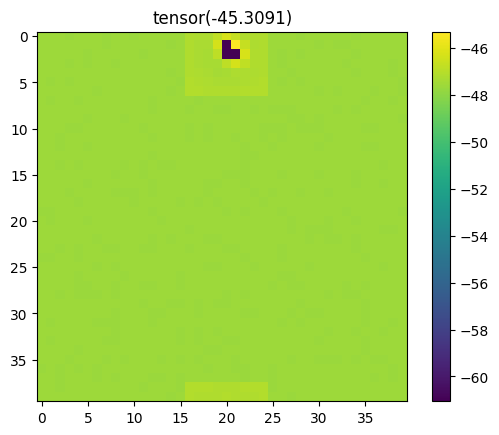

In [5]:
fig = plt.figure()
vv = V_test_f[18]
plt.imshow(vv)
plt.colorbar()
plt.title(vv.max())

In [4]:
#np.save('./activity.npy', activity)
#activity = np.load('./activity.npy')
a = activity.reshape((int(activity.shape[0]/5), 5, mapsize[0], mapsize[1], -1)).mean(axis=(1,-1))
a_ = np.roll(a, 1, axis=0)
a__ = np.roll(a, 2, axis=0)
a_[0] = 0
a__[[0, 1]] = 0
a = a+0.5*a_+0.3*a__

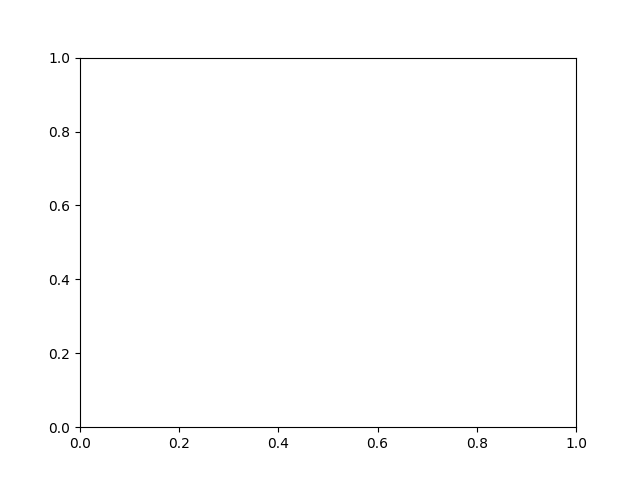

In [5]:
%matplotlib widget
from matplotlib.animation import FuncAnimation, FFMpegWriter, PillowWriter
# Function to update the plot for each frame of the animation

fig, ax = plt.subplots()

def update(frame):
    ax.imshow(a[frame], vmin=0, vmax=0.5)
    ax.axis('off')  # Turn off axis
    ax.set_title(f'Frame {frame}')
    return ax

# Create the animation
ani = FuncAnimation(fig, update, frames=a.shape[0], interval=50, repeat=False)

# Display the animation
plt.show()
 

In [6]:
writervideo = FFMpegWriter(fps=20)
ani.save('activity.mp4', writer=writervideo, dpi=80) 
plt.close() 

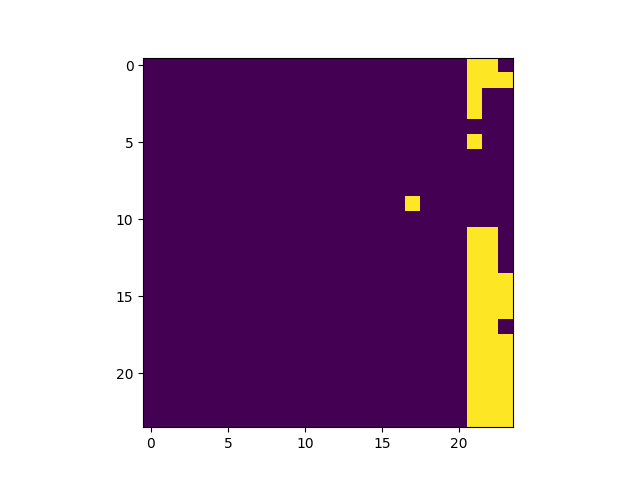

In [24]:
fig = plt.figure()
plt.imshow(activity[1060:1065].mean(axis=0).reshape(mapsize))

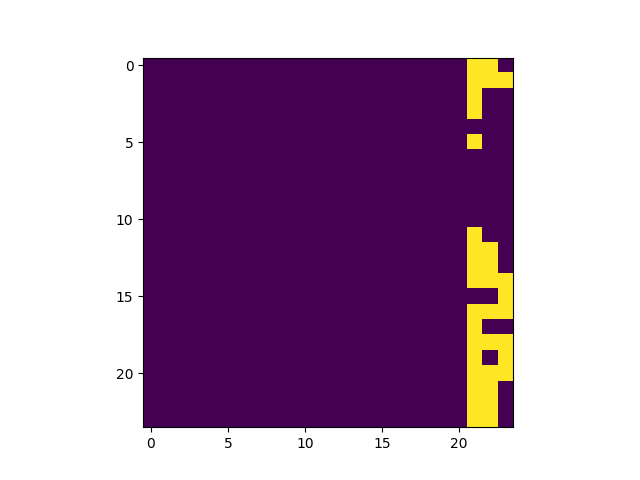

In [23]:
fig = plt.figure()
plt.imshow(activity[1079].reshape([24, 24]))

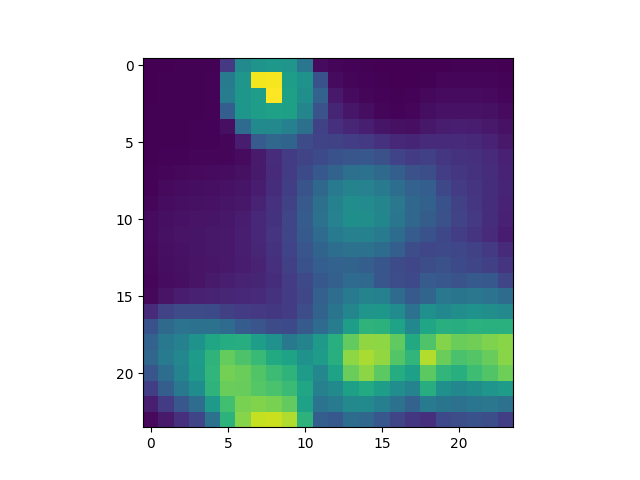

In [15]:
fig = plt.figure()
plt.imshow(simu.net.NeuGroups['fluid'].theta.reshape([24, 24]).cpu())

In [11]:
im=np.load('./data/fr/4_30.npy')

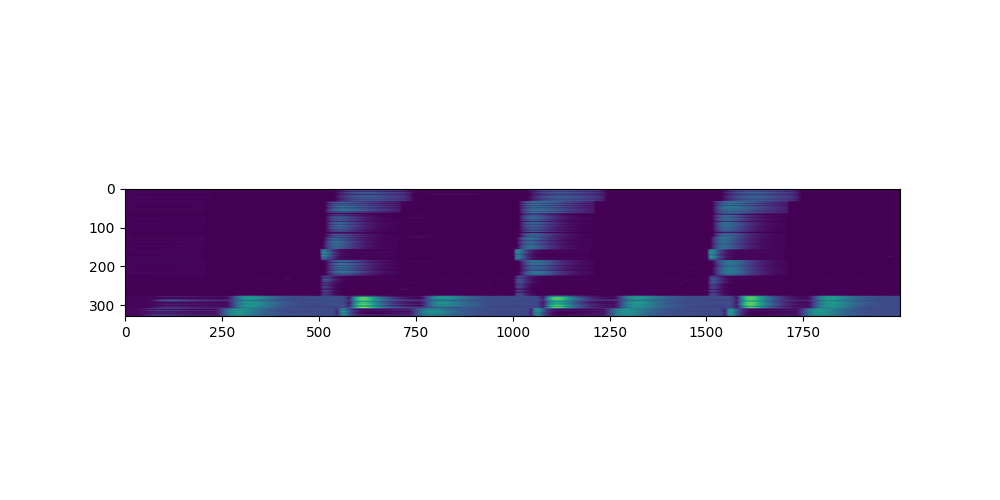

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.imshow(im[:2000, 134:].T)

In [7]:
simu.net.NeuGroups['fluid'].theta[[31, 32, 55, 56]]

tensor([4.2823, 4.2945, 1.4032, 1.4069], device='cuda:0')

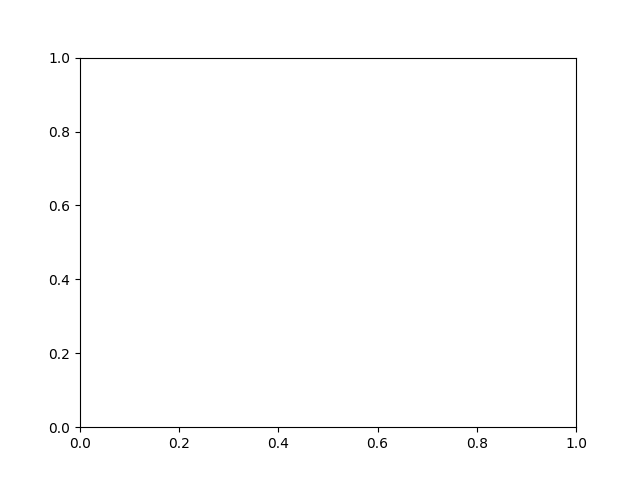

In [4]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
# Function to update the plot for each frame of the animation

fig1, ax1 = plt.subplots()

def update1(frame):
    ax1.imshow(activity[500+frame].reshape([24, 24]))
    ax1.axis('off')  # Turn off axis
    ax1.set_title(f'Frame {frame}')
    return ax1

# Create the animation
ani1 = FuncAnimation(fig1, update1, frames=500, interval=40)

# Display the animation
plt.show()

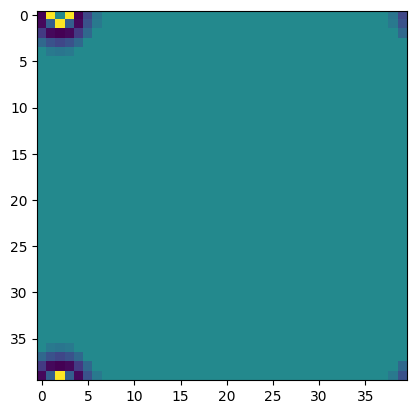

In [5]:
fig=plt.figure()
plt.imshow((w_rec[2]-w_ei[2]).reshape(mapsize))

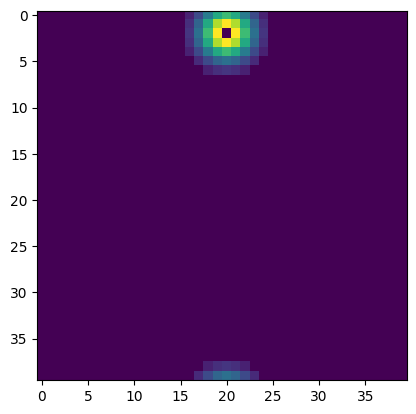

In [40]:
fig=plt.figure()
plt.imshow(w_ei[100].reshape(mapsize))

In [2]:
w_ei.max()

0.8412484512922977

In [6]:
np.max(w_rec[2]*20)

7.278367916551602

In [3]:
np.max(w_ei[2]*30)

21.0

In [4]:
np.min(w_ie[2]*10)

-0.01

In [8]:
w_rec.max()

0.8491429235976867

In [7]:
w = simu.net.SynGroups['input-fluid'].w.cpu().numpy()

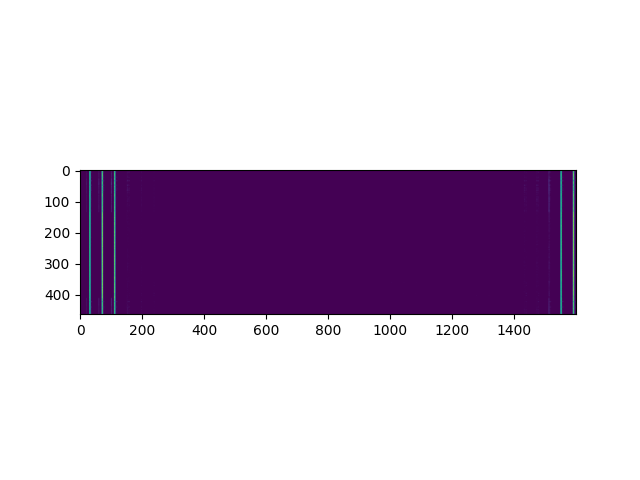

In [8]:
fig = plt.figure()
plt.imshow(w)

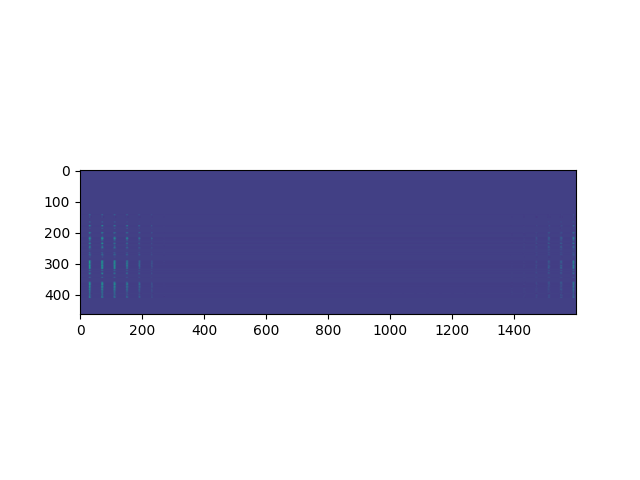

In [9]:
w_inh = simu.net.SynGroups['input-inh'].w.cpu().numpy()
fig = plt.figure()
plt.imshow(w_inh)

In [13]:
w1 = w[:, np.arange(-150, 150)]

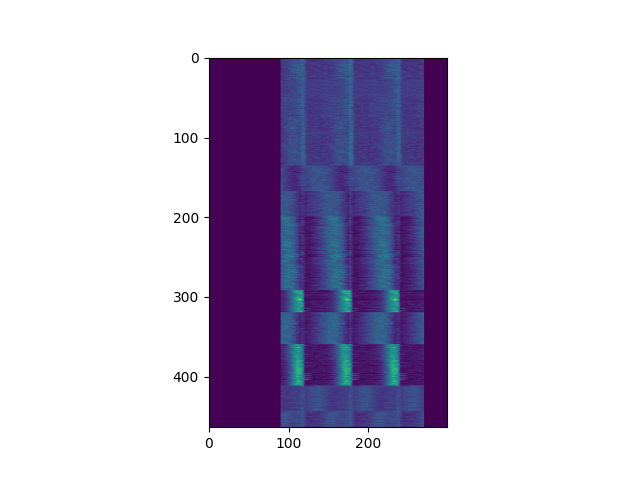

In [14]:
fig = plt.figure()
plt.imshow(w1)

In [10]:
w[:, 0].mean()

tensor(0.0022)

In [12]:
w[400].sum()

tensor(0.1695)

In [9]:
w.max()

tensor(0.0185)

# Generate Input Movies

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np

from bmtk.simulator import filternet
from bmtk.analyzer.spike_trains import plot_raster
import h5py

label = 4
trainset = datasets.MNIST(root='./data',train=True,download=True, transform = transforms.ToTensor(),)
idx = trainset.train_labels==label
trainset.targets = trainset.targets[idx]
trainset.data = trainset.data[idx]

batch_size = 10
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=4)
dataiter = iter(trainloader)


config = filternet.Config.from_json('LGN/config.json')
config.build_env()


for i in range(600):
    images, train_labels = next(dataiter)
    movieLen = batch_size*500
    max_intensity = 10
    movie = torch.zeros((movieLen, 32, 32))
    for j in range(batch_size):
        movie[j*500: j*500+200, 2:-2, 2:-2] = images[j, 0] * max_intensity
        movie[j*500+200: j*500+500] = torch.clamp((0.3+torch.randn(300, 32, 32)), 0) * max_intensity

    print(i)
    np.save('./data/1.npy', movie.numpy())
    net = filternet.FilterNetwork.from_config(config)
    sim = filternet.FilterSimulator.from_config(config, net)
    sim.run()
    fr = h5py.File('./LGN/output/rates.h5', 'r')
    np.save('./data/fr/%d_%d.npy'%(label,i), fr['firing_rates']['lgn']['firing_rates_Hz'][:]/1000)
    del(fr)
    del(sim)
    del(net)
    


2024-04-30 16:05:42,139 [INFO] Created log file


C:\Anaconda3\envs\neural\Lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


0
2024-04-30 16:05:44,105 [INFO] Building cells.
2024-04-30 16:05:44,107 [DEBUG]  Adding lgn cells.
2024-04-30 16:05:44,797 [DEBUG]   Adding cell 47 of 464.
2024-04-30 16:05:45,579 [DEBUG]   Adding cell 94 of 464.
2024-04-30 16:05:46,302 [DEBUG]   Adding cell 141 of 464.
2024-04-30 16:05:47,024 [DEBUG]   Adding cell 188 of 464.
2024-04-30 16:05:47,821 [DEBUG]   Adding cell 235 of 464.
2024-04-30 16:05:48,580 [DEBUG]   Adding cell 282 of 464.
2024-04-30 16:05:49,285 [DEBUG]   Adding cell 329 of 464.
2024-04-30 16:05:50,079 [DEBUG]   Adding cell 376 of 464.
2024-04-30 16:05:51,291 [DEBUG]   Adding cell 423 of 464.
2024-04-30 16:05:53,748 [INFO] Evaluating rates.
2024-04-30 16:05:55,114 [DEBUG]  Processing cell 47 of 464.
2024-04-30 16:05:55,931 [DEBUG]  Processing cell 94 of 464.
2024-04-30 16:05:56,725 [DEBUG]  Processing cell 141 of 464.
2024-04-30 16:05:57,456 [DEBUG]  Processing cell 188 of 464.
2024-04-30 16:05:58,247 [DEBUG]  Processing cell 235 of 464.
2024-04-30 16:05:59,034 [DEB

IndexError: index 2 is out of bounds for dimension 0 with size 2

In [2]:
from bmtk.simulator import filternet
from bmtk.analyzer.spike_trains import plot_raster

config = filternet.Config.from_json('LGN/config.json')
config.build_env()
net = filternet.FilterNetwork.from_config(config)

sim = filternet.FilterSimulator.from_config(config, net)
sim.run()

_ = plot_raster(config_file='LGN/config.json')

PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'C:\\Users\\Bingkun LIU\\Desktop\\Ongoing Rearch\\Rank\\LGN\\output\\log.txt'